In [1]:
import os
import pickle
import sys

import pandas as pd
import numpy as np
from matplotlib.pyplot import rcParams
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv

# Get the current working directory
CURRENT_DIR = os.getcwd()

# Set the root directory to the parent of the current directory
ROOT = os.path.abspath(os.path.join(CURRENT_DIR, os.pardir))
sys.path.insert(0, ROOT)

from notebooks.plotting_tools import *
from code_.model_configs import analysis_cfg
from code_.model_activations.models.utils import load_full_identifier
from plotting_tools import *

load_dotenv()
CACHE = os.getenv("CACHE")
RESULTS_PATH = os.path.join(ROOT,'results')

In [2]:
MULTIPLIER = 36

def load_and_prepare_data(model_name, multiplier, dataset, region):
    filepath = os.path.join(RESULTS_PATH, model_name + '_' + dataset + '_' + region + '.pkl')
    with open(filepath, 'rb') as file:
        df = pickle.load(file)
    df['model'] = model_name
    df['features'] = df['features'].apply(lambda x: int(x) * multiplier)
    df['score'] = df['score'].astype(np.float32)
    return df

In [3]:
DATASET = 'naturalscenes' # one of ['majajhong', 'naturalscenes']
region = analysis_cfg[DATASET]['regions']

In [5]:
# loading linear model data
df = load_and_prepare_data('non_linearity', MULTIPLIER, DATASET, region)

/tmp/ipykernel_8313/3887733728.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x = df['nl_type'],
/tmp/ipykernel_8313/3887733728.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend().remove()


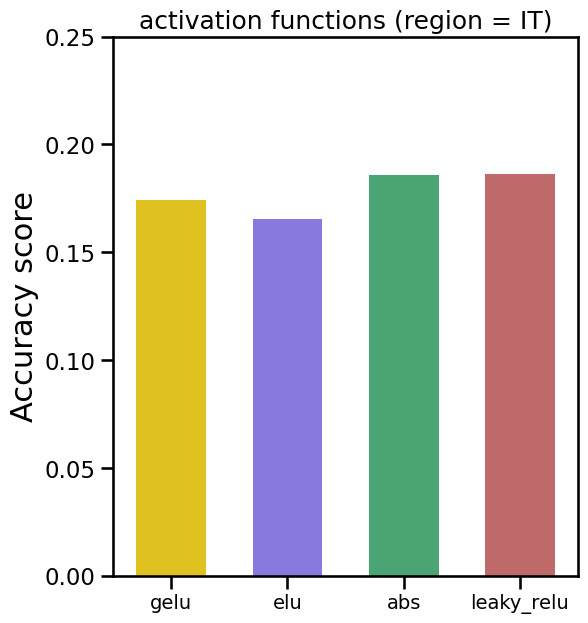

In [6]:
sns.set_context(context='talk')    
plt.rcParams['figure.figsize'] = (6,7)

palette = {         
    'relu':'royalblue',
    'leaky_relu':'indianred',
    'gelu':'gold',
    'elu':'mediumslateblue',
    'abs':'mediumseagreen',
    'None':'gray'
}

ax1 = sns.barplot(x = df['nl_type'], 
                  y = df['score'], 
                       palette=palette,
                       width=0.6, 
                       dodge=False)            
    
ax1.legend().remove()
plt.xlabel('')
plt.ylabel(size=22, ylabel='Accuracy score')    
plt.xticks(size=14)
plt.title('activation functions (region = IT)')
plt.ylim(0,0.65) if region == 'IT' else plt.ylim(0,0.25)
plt.savefig(os.path.join(ROOT, f'figures/figure_s2_{DATASET}_{region}.png'), dpi=200) 
plt.show()